均值: 0.12153411984443664 秒
中值: 0.1189870834350586 秒
最大值: 0.8321161270141602 秒
最小值: 0.11800003051757812 秒


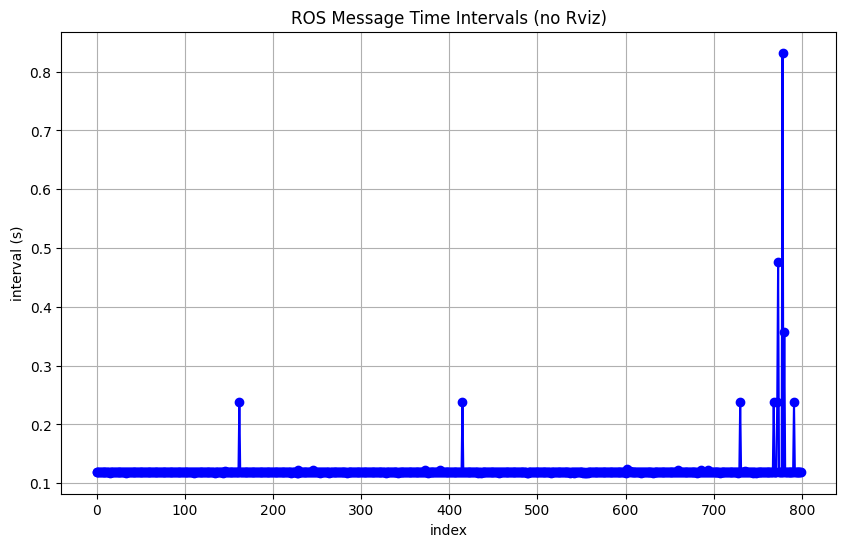

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.font_manager import FontProperties

# 设置中文显示
font = FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')  # 替换为您系统中的中文字体路径

file_path = 'ts-data-quiet.txt'
timestamps = []

with open(file_path, 'r') as file:
    lines = file.readlines()
    for i in range(len(lines) - 1):  # 避免越界
        if 'sec' in lines[i] and 'nanosec' in lines[i + 1]:
            sec = int(lines[i].split(':')[-1].strip())
            nanosec = int(lines[i + 1].split(':')[-1].strip())
            timestamp = sec + nanosec * 1e-9
            timestamps.append(timestamp)
            if (len(timestamps) > 800):
                break

time_intervals = [timestamps[i + 1] - timestamps[i] for i in range(len(timestamps) - 1)]

# print("%d" % len(timestamps))
# print("%d" % len(time_intervals))

# print(time_intervals[0:10])

mean_interval = sum(time_intervals) / len(time_intervals)
median_interval = sorted(time_intervals)[len(time_intervals) // 2]
max_interval = max(time_intervals)
min_interval = min(time_intervals)

print(f"均值: {mean_interval} 秒")
print(f"中值: {median_interval} 秒")
print(f"最大值: {max_interval} 秒")
print(f"最小值: {min_interval} 秒")

# for i in range(len(time_intervals)):
#     if (time_intervals[i] > 0.40):
#         print(f"i: {i}, {time_intervals[i]}") 

# 绘制时间间隔的图表
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, marker='o', linestyle='-', color='b')
plt.title('ROS Message Time Intervals (no Rviz)')
plt.xlabel('index')
plt.ylabel('interval (s)')
plt.grid(True)
plt.show()